## Module imports

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

## Data Loading

In [68]:
!ls ../data

ks-projects-201612.csv	ks-projects-201801.csv	ks-projects-201801_tmp.csv


In [69]:
FILEPATH = os.path.join('..', 'data', 'ks-projects-201801.csv')
FILEPATH

'../data/ks-projects-201801.csv'

In [70]:
df = pd.read_csv(FILEPATH, index_col=0)
df.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [71]:
NUM_VARS = ['usd_goal_real', 'usd_pledged_real', 'backers']
CAT_VARS = ['category', 'main_category', 'currency', 'country']
TARGET = 'state'

In [72]:
num_features = NUM_VARS
cat_features = CAT_VARS

In [73]:
X = df.loc[:, num_features + cat_features]
y = df[TARGET]
X.shape, y.shape

((378661, 7), (378661,))

In [74]:
for col in CAT_VARS:
    X[col] = X[col].astype('category').cat.codes
X.head()

,usd_goal_real,usd_pledged_real,backers,category,main_category,currency,country
ID,,,,,,,
1000002330,1533.95,0.0,0,108,12,5,9
1000003930,30000.00,2421.0,15,93,6,13,22
1000004038,45000.00,220.0,3,93,6,13,22
1000007540,5000.00,1.0,1,90,10,13,22
1000011046,19500.00,1283.0,14,55,6,13,22


In [90]:
from sklearn.model_selection import train_test_split

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((283995, 7), (283995,), (94666, 7), (94666,))

In [98]:
from sklearn.ensemble import RandomForestClassifier

In [99]:
m = RandomForestClassifier()
m.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [100]:
m.score(X_train, y_train), m.score(X_test, y_test)

(0.97023891265691298, 0.85944267213149383)

## Scoring of test predictions

In [101]:
from sklearn.metrics import accuracy_score

In [108]:
y_test_pred = m.predict(X_test)
y_test_pred

array(['failed', 'failed', 'failed', ..., 'successful', 'failed', 'failed'], dtype=object)

In [147]:
accuracy_score(y_test, y_test_pred)

0.85944267213149383

## Feature engineering

In [181]:
X['completion_rate'] = X['usd_pledged_real'] / X['usd_goal_real'] * 100
X['completion_rate'].head()

ID
1000002330    0.000000
1000003930    8.070000
1000004038    0.488889
1000007540    0.020000
1000011046    6.579487
Name: completion_rate, dtype: float64

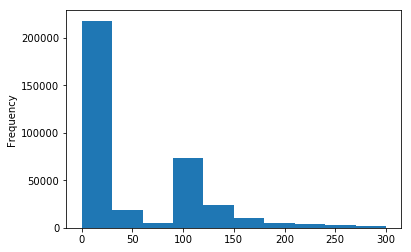

In [182]:
X.loc[X['completion_rate'] < 300, 'completion_rate'].plot.hist();

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((283995, 8), (283995,), (94666, 8), (94666,))

In [184]:
m.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [185]:
y_test_pred = m.predict(X_test)
y_test_pred[:5]

array(['failed', 'failed', 'failed', 'failed', 'successful'], dtype=object)

In [186]:
accuracy_score(y_test, y_test_pred)

0.86147085542855939

## Train/valid split

In [187]:
X_train_new, X_valid, y_train_new, y_valid = train_test_split(X_train, y_train,
                                                              test_size=.2, random_state=42, stratify=y_train)

In [188]:
m1 = RandomForestClassifier(n_estimators=10)
m2 = RandomForestClassifier(n_estimators=20)

In [189]:
m1.fit(X_train_new, y_train_new)
m2.fit(X_train_new, y_train_new)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [190]:
m1_score = accuracy_score(y_valid, m1.predict(X_valid))
m2_score = accuracy_score(y_valid, m2.predict(X_valid))
m1_score, m2_score

(0.86108910368140279, 0.86793781580661633)

In [191]:
m2_test_score = accuracy_score(y_test, m2.predict(X_test))
m2_test_score

0.86793568968795554

## Cross-Validation

In [192]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.2, random_state=42, stratify=y)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((302928, 8), (302928,), (75733, 8), (75733,))

In [193]:
from sklearn.model_selection import cross_val_score

In [194]:
m1_scores = cross_val_score(m1, X_train, y_train, cv=5)
m2_scores = cross_val_score(m2, X_train, y_train, cv=5)
m1_scores, m2_scores

(array([ 0.86031657,  0.86056415,  0.8604298 ,  0.86087315,  0.86015879]),
 array([ 0.86703418,  0.86728176,  0.8673786 ,  0.86663366,  0.86740505]))

In [195]:
np.mean(m1_scores), np.mean(m2_scores)

(0.86046849261812197, 0.86714664949940823)

## DecisionTreeClassifier

In [196]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [197]:
dt_scores = cross_val_score(dt, X_train, y_train, cv=5)
dt_scores

array([ 0.81585159,  0.81741958,  0.81320767,  0.81252785,  0.81448591])

In [198]:
dt_1 = DecisionTreeClassifier(max_depth=10)
dt_2 = DecisionTreeClassifier(max_depth=20)
dt_1_scores = cross_val_score(dt_1, X_train, y_train, cv=5)
dt_2_scores = cross_val_score(dt_2, X_train, y_train, cv=5)

In [200]:
np.mean(dt_1_scores), np.mean(dt_2_scores)

(0.88373144289263939, 0.85954748956349203)

## Random Forest

In [201]:
rf = RandomForestClassifier(n_estimators=20, oob_score=True)
rf.fit(X_train, y_train)

/Users/flo/bin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/flo/bin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

In [202]:
rf.oob_score_

0.85646094121375371

In [205]:
first_dt = rf.estimators_[0]
first_dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1761706691, splitter='best')

In [208]:
first_dt.predict(X_test)

array([ 1.,  0.,  3., ...,  2.,  1.,  3.])

In [209]:
rf.classes_

array(['canceled', 'failed', 'live', 'successful', 'suspended', 'undefined'], dtype=object)

In [226]:
preds = []
for t in rf.estimators_:
    preds.append(t.predict(X_test))
np_preds = np.array(preds)
np_preds

array([[ 1.,  0.,  3., ...,  2.,  1.,  3.],
       [ 1.,  0.,  3., ...,  1.,  1.,  3.],
       [ 0.,  4.,  3., ...,  0.,  1.,  3.],
       ..., 
       [ 0.,  4.,  3., ...,  1.,  1.,  3.],
       [ 1.,  1.,  3., ...,  1.,  0.,  3.],
       [ 0.,  4.,  3., ...,  1.,  1.,  3.]])

In [230]:
np_preds.shape

(20, 75733)

In [231]:
import scipy

In [245]:
mode_result = scipy.stats.mode([1, 1, 1, 2, 2, 2])
mode_result

ModeResult(mode=array([1]), count=array([3]))

In [249]:
mode_result.mode, mode_result.count

(array([1]), array([3]))

In [248]:
mode_result.mode[0]

1

In [264]:
mode_preds = scipy.stats.mode(np_preds).mode
mode_preds

array([[ 1.,  1.,  3., ...,  1.,  1.,  3.]])

In [265]:
mode_counts = scipy.stats.mode(np_preds).count
mode_counts

array([[12,  9, 20, ..., 18, 16, 20]])

In [270]:
counts = pd.DataFrame({'pred': mode_preds[0], 'count': mode_counts[0]})
counts.head()

,pred,count
0,1.0,12
1,1.0,9
2,3.0,20
3,1.0,16
4,3.0,20


In [280]:
# Or we can use squeeze to remove useless dimensions
freqs = pd.DataFrame({'pred': np.squeeze(mode_preds), 'frequency': np.squeeze(mode_counts) / len(rf.estimators_) * 100})
freqs.head()

,pred,frequency
0,1.0,60.0
1,1.0,45.0
2,3.0,100.0
3,1.0,80.0
4,3.0,100.0
